# This notebook generates final results of the work.

In [1]:
import numpy as np  # Numerical operations and array handling
import matplotlib.pyplot as plt  # Data visualization
import pickle  # Serialization and deserialization of Python objects
import itertools  # Functions for creating iterators for efficient looping

Results of the communication rounds of the distributed learning approaches are saved in: <br>
-  results_Test_customized_1_v4.1_noValidation.pkl <br>
-  results_Test_GL_fixed_v4.1_noValidation.pkl <br>
-  results_Test_GL_random_v4.1_noValidation.pkl <br>
-  results_Test_RAR_v4.1_noValidation.pkl <br>
-  results_Test_FL_v4.1_noValidation.pkl <br>

Dictionary with the distributed architecture data.

In [2]:
filename_dict = {
    'customized': 'results_Test_customized_1_v4.1_noValidation.pkl',
    'GL_conditional': 'results_Test_GL_fixed_v4.1_noValidation.pkl',
    'GL_random': 'results_Test_GL_random_v4.1_noValidation.pkl',
    'RAR': 'results_Test_RAR_v4.1_noValidation.pkl',
    'FL': 'results_Test_FL_v4_noValidation.pkl'
}

Loading the data.

In [3]:
# List to save the loaded data of each file
all_data = {}

# Run the dictionary of filenames:
for key, filename in filename_dict.items():
    with open(filename, 'rb') as file:
        loaded_data = pickle.load(file)

    # Add data to the dictionary
    all_data[key] = {
        'acc_test_round': loaded_data['acc_test_round'],
        'loss_test_round': loaded_data['loss_test_round'],
        'AUC_test_round': loaded_data['AUC_test_round'],
        'save_weights': loaded_data['save_weights']
    }

Method to calculate the weighted average of a metric.

In [4]:
def weighted_mean(n_i, metric_list):
    """
    Calculate the weighted mean of an evaluation metric.

    :param list n_i: Number of samples for each client
    :param list metric_list: List of evaluation metric values for each client
    :return: Weighted mean of the evaluation metric
    """
    total_samples = sum(n_i)  # Total number of samples of all clients
    weighted_metric_sum = 0.0

    for j in range(len(n_i)):
        weighted_metric_sum += metric_list[j] * n_i[j]

    weighted_mean = weighted_metric_sum / total_samples
    return weighted_mean

Calculating the average test metrics of rounds for each architecture.

In [5]:
client_names = ['clev','hung','long','stat','swit']
n_i = [114, 219, 103, 113, 138]

In [6]:
metricLen = len(all_data['customized']['acc_test_round'][1])
numberOfClients = len(client_names)

# Dictionary to save the average test metrics.
test_round_avg = {}
# Loop operating with the loaded data:
for arch in all_data:
    acc_test_round_avg = []
    loss_test_round_avg = []
    AUC_test_round_avg = []
    for j in range(metricLen):
        roundTemp_acc = []
        roundTemp_loss = []
        roundTemp_AUC = []
        for i in range(numberOfClients):
            roundTemp_acc.append(all_data[arch]['acc_test_round'][i][j])
            roundTemp_loss.append(all_data[arch]['loss_test_round'][i][j])
            roundTemp_AUC.append(all_data[arch]['AUC_test_round'][i][j])
        # Using "weighted_mean" method
        acc_test_round_avg.append(weighted_mean(n_i,roundTemp_acc))
        loss_test_round_avg.append(weighted_mean(n_i,roundTemp_loss))
        AUC_test_round_avg.append(weighted_mean(n_i,roundTemp_AUC))
    test_round_avg[arch] = {
        'acc_test_round_avg': acc_test_round_avg,
        'loss_test_round_avg': loss_test_round_avg,
        'AUC_test_round_avg':  AUC_test_round_avg
    }

## Plotting the average test metrics running its dictionary.

### Plotting the 100 rounds.

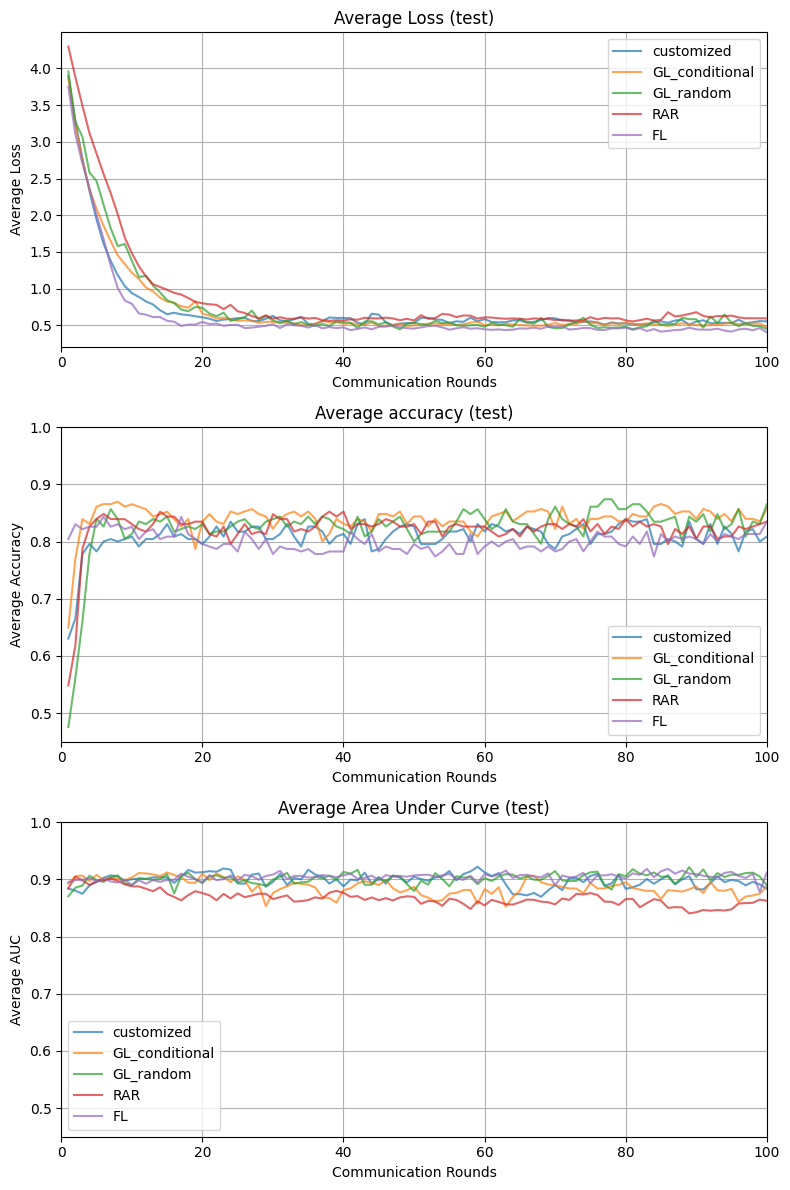

In [7]:
# Create a figure with three subplots (one row and three columns)
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8, 12))

for arch in test_round_avg:
    arch_accuracy = test_round_avg[arch]['acc_test_round_avg']
    arch_loss = test_round_avg[arch]['loss_test_round_avg']
    arch_auc = test_round_avg[arch]['AUC_test_round_avg']
    
    # Subplot 1: Loss Curve
    ax1.plot(range(1, metricLen + 1), arch_loss, label= arch, alpha=0.7)

    # Subplot 2: Accuracy Curve
    ax2.plot(range(1, metricLen + 1), arch_accuracy, label= arch, alpha=0.7)

    # Subplot 3: AUC Curve
    ax3.plot(range(1, metricLen + 1), arch_auc, label= arch, alpha=0.7)

# Add labels and titles to subplots
ax1.set_xlabel('Communication Rounds')
ax1.set_ylabel('Average Loss')
ax1.set_title('Average Loss (test)')
ax1.set(xlim=(0, 100))
ax1.grid()
ax1.legend()

ax2.set_xlabel('Communication Rounds')
ax2.set_ylabel('Average Accuracy')
ax2.set_title('Average accuracy (test)')
ax2.set(xlim=(0, 100))
ax2.set(ylim=(0.45, 1))
ax2.grid()
ax2.legend()

ax3.set_xlabel('Communication Rounds')
ax3.set_ylabel('Average AUC')
ax3.set_title('Average Area Under Curve (test)')
ax3.set(xlim=(0, 100))
ax3.set(ylim=(0.45, 1))
ax3.grid()
ax3.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### Plotting only the early rounds.

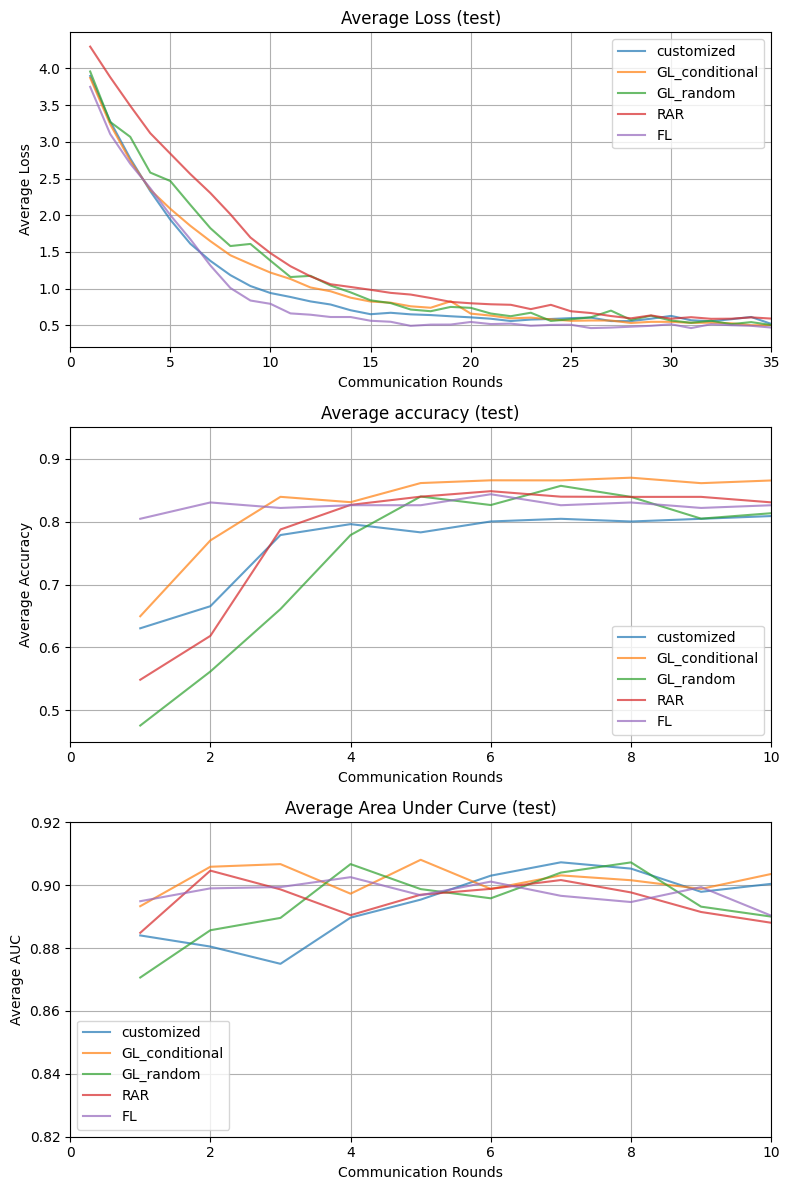

In [8]:
# Create a figure with three subplots (one row and three columns)
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8, 12))

for arch in test_round_avg:
    arch_accuracy = test_round_avg[arch]['acc_test_round_avg']
    arch_loss = test_round_avg[arch]['loss_test_round_avg']
    arch_auc = test_round_avg[arch]['AUC_test_round_avg']
    
    # Subplot 1: Loss Curve
    ax1.plot(range(1, metricLen + 1), arch_loss, label= arch, alpha=0.7)

    # Subplot 2: Accuracy Curve
    ax2.plot(range(1, metricLen + 1), arch_accuracy, label= arch, alpha=0.7)

    # Subplot 3: AUC Curve
    ax3.plot(range(1, metricLen + 1), arch_auc, label= arch, alpha=0.7)

# Add labels and titles to subplots
ax1.set_xlabel('Communication Rounds')
ax1.set_ylabel('Average Loss')
ax1.set_title('Average Loss (test)')
ax1.set(xlim=(0, 35))
ax1.grid()
ax1.legend()

ax2.set_xlabel('Communication Rounds')
ax2.set_ylabel('Average Accuracy')
ax2.set_title('Average accuracy (test)')
ax2.set(xlim=(0, 10))
ax2.set(ylim=(0.45, .95))
ax2.grid()
ax2.legend()

ax3.set_xlabel('Communication Rounds')
ax3.set_ylabel('Average AUC')
ax3.set_title('Average Area Under Curve (test)')
ax3.set(xlim=(0, 10))
ax3.set(ylim=(0.82, 0.92))
ax3.grid()
ax3.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Plotting the average weight divergence of each architecture.

In [9]:
def weight_divergence(weights_m, weights_n):
    """
    Compute the weight divergence between two sets of weights.

    :param list weights_m: Set of weights for model m
    :param list weights_n: Set of weights for model n
    :return: Weight divergence between the two sets of weights
    """
    # Flatten the weights arrays to 1-dimensional arrays
    flat_weights_m = np.concatenate([w.ravel() for w in weights_m])
    flat_weights_n = np.concatenate([w.ravel() for w in weights_n])

    # Compute the Euclidean norm of the difference between weights_m and weights_n
    norm_diff = np.linalg.norm(flat_weights_m - flat_weights_n)

    # Compute the Euclidean norm of weights_m and weights_n
    norm_m = np.linalg.norm(flat_weights_m)
    norm_n = np.linalg.norm(flat_weights_n)

    # Calculate the weight divergence
    divergence = norm_diff / (0.5 * (norm_m + norm_n))

    return divergence

In [10]:
weightsLen = len(all_data['customized']['save_weights'])
weight_div_avg = {}
for arch in all_data:
    if arch == 'FL':
        continue
    divergences = []
    for j in range(weightsLen):
        divergences_round = []
        for pair in itertools.combinations(range(5), 2):
            client_a = pair[0]
            client_b = pair[1]
            divergence = weight_divergence(all_data[arch]['save_weights'][j][client_a][0], all_data[arch]['save_weights'][j][client_b][0])
            divergences_round.append(divergence)
        divergences.append(np.mean(divergences_round))
    weight_div_avg[arch] = divergences

[(0.0, 100.0)]

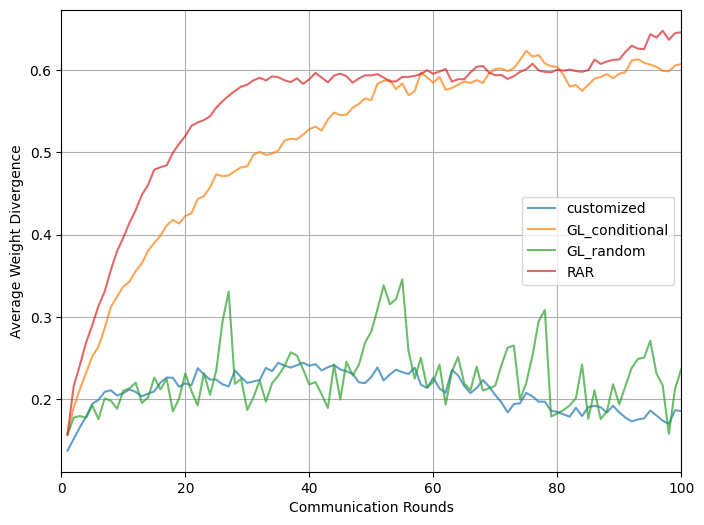

In [11]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(8, 6))
for arch in weight_div_avg:
    # Plotting average weight divergence for each architecture
    ax.plot(range(int(100/weightsLen), int(100/weightsLen) + 100, int(100/weightsLen)), weight_div_avg[arch],label= arch, alpha=0.7)
ax.set_xlabel('Communication Rounds')
ax.set_ylabel('Average Weight Divergence')
ax.grid()
ax.legend()
ax.set(xlim=(0,100))